<a href="https://colab.research.google.com/github/LuisFerCuadros/Quimica/blob/main/Cin%C3%A9ticaQu%C3%ADmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 9.6 MB/s eta 0:00:00


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [3]:
smiles_2 = "F\C=C/C"
#F/C(Br)=C(/Cl)I
mol_izq = Chem.MolFromSmiles(smiles_2)

In [4]:
mol_izqh = Chem.AddHs(mol_izq)
Chem.AllChem.EmbedMolecule(mol_izqh)

0

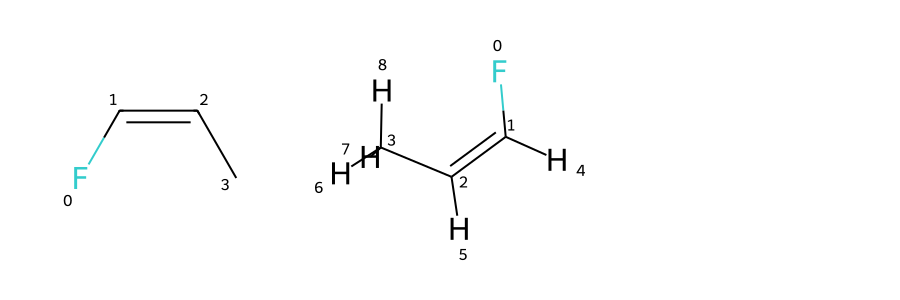

In [5]:
Chem.MolToXYZFile(mol_izqh,"toluene_2.xyz")
Draw.MolsToGridImage([mol_izq, mol_izqh], subImgSize=(300,300))

In [6]:
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol_izqh.GetConformer(0),1,2,3,6,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol_izqh, f"{i}.xyz")

In [7]:
from pyscf import gto, dft
mol_izqhh = gto.M(atom="toluene_2.xyz")

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [8]:
mol_izqhh.basis = "3-21G"

In [9]:
mf = dft.KS(mol_izqhh)
mf.xc = 'b3lyp'

In [10]:
energy_1 = mf.kernel()

converged SCF energy = -214.251651928338


In [11]:
print("Energía total de los reactivos es: ", energy_1)

Energía total de los reactivos es:  -214.2516519283377


In [12]:
smiles = "F/C=C/C"

In [13]:
mol = Chem.MolFromSmiles(smiles)

In [14]:
mol_h = Chem.AddHs(mol)

In [15]:
Chem.AllChem.EmbedMolecule(mol_h)

0

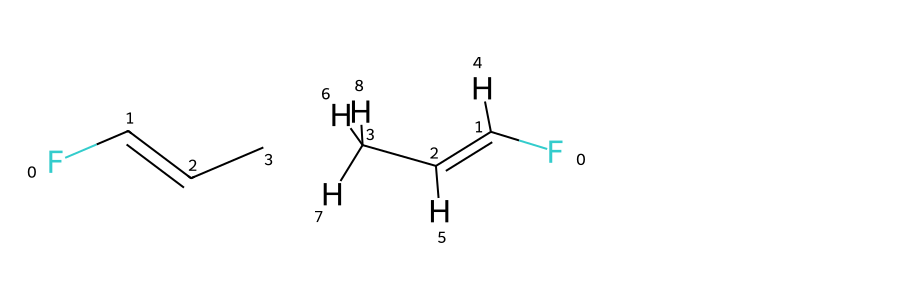

In [16]:
Chem.MolToXYZFile(mol_h, "toluene.xyz")
Draw.MolsToGridImage([mol, mol_h], subImgSize=(300,300))

In [17]:
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol_h.GetConformer(0),1,2,3,6,i)
  Chem.MolToXYZFile(mol_h, f"{i}.xyz")

In [18]:
mol_hh = gto.M(atom="toluene.xyz")
mol_hh.basis = "3-21G"
mf = dft.KS(mol_hh)
mf.xc = 'b3lyp'
energy = mf.kernel()
print("Energía total de  los productos es:", energy)

converged SCF energy = -214.251852671682
Energía total de  los productos es: -214.25185267168166


In [19]:
energia_activacion = energy - energy_1
print("La energia de activacion es: ", energia_activacion)
print("La reacion es exotermica")

La energia de activacion es:  -0.00020074334395303595
La reacion es exotermica


In [20]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-9r5tcj7f
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-9r5tcj7f
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9466 sha256=e4e6a5f6ace7bd04ce27ad3fb7b8c71c2b6895a02a880bf215db554c30ccf83d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ic37hui0/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


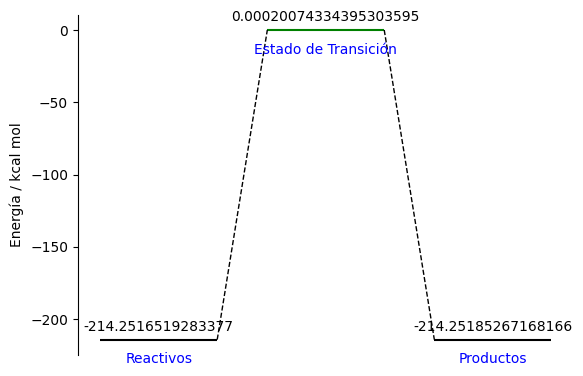

In [24]:
import matplotlib.pyplot as plt
from energydiagram import ED

energia_reactivos = energy_1
energia_productos = energy


energia_activacion = energia_reactivos - energia_productos


diagram = ED()


diagram.add_level(energia_reactivos, 'Reactivos')
diagram.add_level(energia_activacion, 'Estado de Transición', color='g')
diagram.add_level(energia_productos, 'Productos')


diagram.add_link(0, 1)
diagram.add_link(1, 2)


diagram.plot(ylabel="Energía / kcal mol")
plt.show()